<a href="https://colab.research.google.com/github/yashveersinghsohi/Hands_On_ML_Book_Practice/blob/master/Chapter_2/Chapter2_Practical_Example_Cali_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Data

In [2]:
root_dir = "https://raw.githubusercontent.com/yashveersinghsohi/Hands_On_ML_Book_Practice/master/Chapter_2/"
housing_path = root_dir + "housing.csv"
housing_path

'https://raw.githubusercontent.com/yashveersinghsohi/Hands_On_ML_Book_Practice/master/Chapter_2/housing.csv'

In [6]:
housing = pd.read_csv(housing_path)
print(housing.shape)
housing.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Histogram**

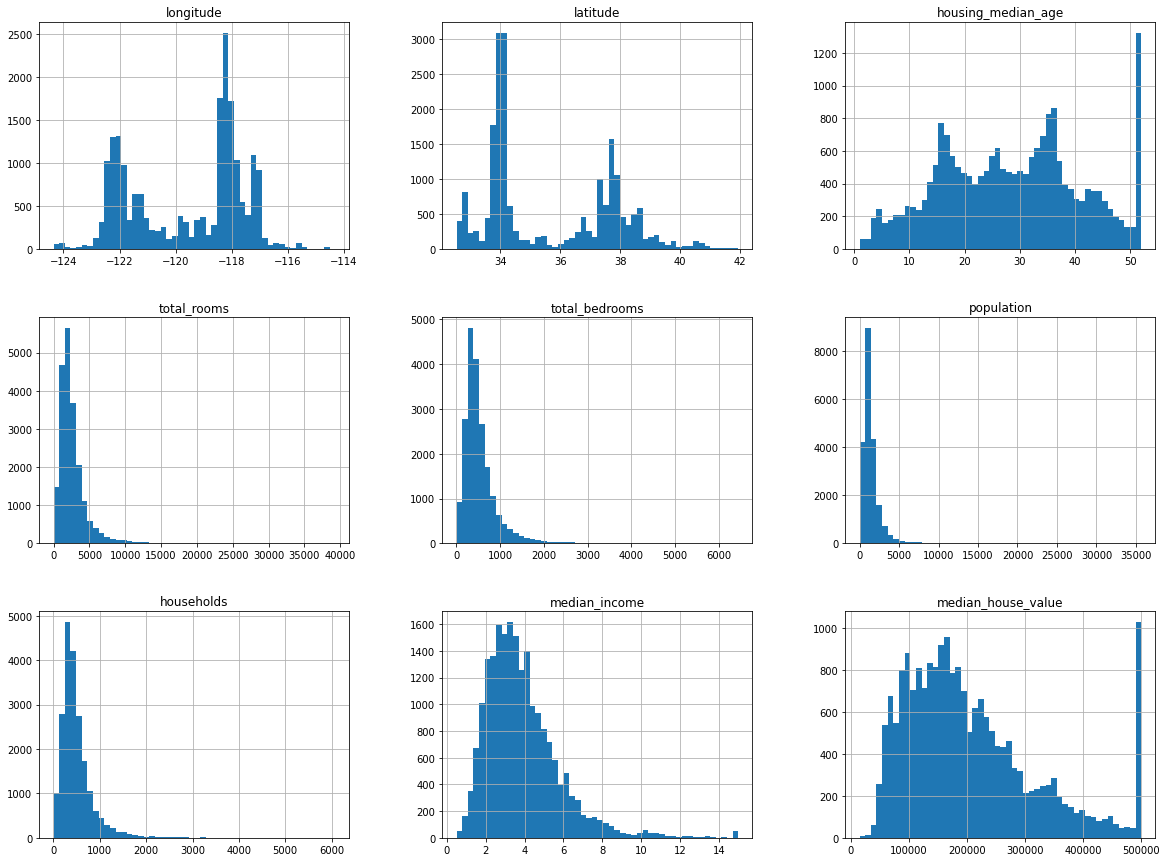

In [12]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

# Train Test Split

## Using train_test_split

In [14]:
train_set, test_set = train_test_split(housing, 
                                       test_size=0.2, 
                                       random_state=42)
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

## Using StratifiedShuffleSplit on median_income

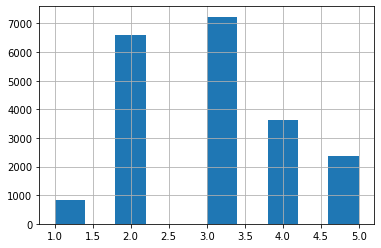

In [21]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()
plt.show()

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_idx, :]
  strat_test_set = housing.loc[test_idx, :]

strat_train_set.shape, strat_test_set.shape

((16512, 11), (4128, 11))

**Train Set Income Distribution**

In [28]:
strat_train_set["income_cat"].value_counts(sort=False) / strat_train_set["income_cat"].shape[0]

1    0.039850
2    0.318859
3    0.350594
4    0.176296
5    0.114402
Name: income_cat, dtype: float64

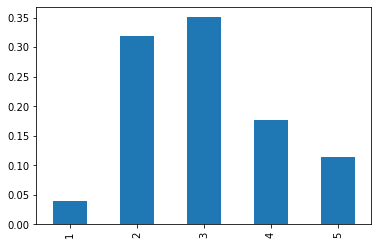

In [30]:
(strat_train_set["income_cat"].value_counts(sort=False) / strat_train_set["income_cat"].shape[0]).plot.bar()
plt.show()

**Test Set Income Distribution**

In [31]:
strat_test_set["income_cat"].value_counts(sort=False) / strat_test_set["income_cat"].shape[0]

1    0.039729
2    0.318798
3    0.350533
4    0.176357
5    0.114583
Name: income_cat, dtype: float64

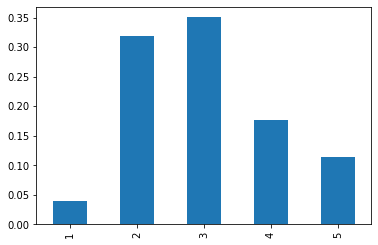

In [32]:
(strat_test_set["income_cat"].value_counts(sort=False) / strat_test_set["income_cat"].shape[0]).plot.bar()
plt.show()

**Reverting Data Back to OG state**

In [33]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop(["income_cat"], axis=1, inplace=True)

In [34]:
strat_train_set.shape, strat_test_set.shape

((16512, 10), (4128, 10))

# Data Exploration

## Exploring only train set

In [35]:
housing = strat_train_set.copy()

## Visualize Geographical Data

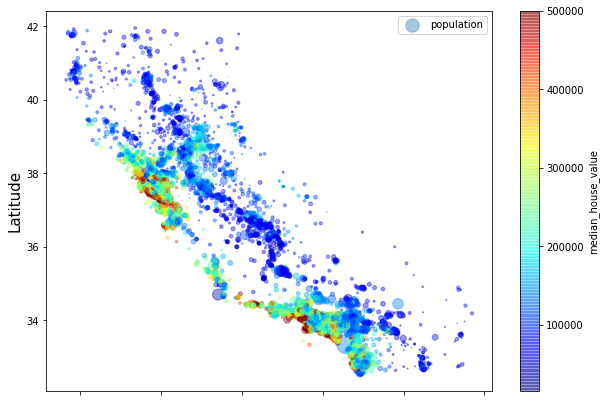

In [43]:
housing.plot(kind="scatter", x="longitude", y="latitude", 
             s=housing["population"]/100, c="median_house_value", 
             label="population", alpha=0.4, 
             colorbar=True, cmap=plt.get_cmap("jet"), 
             figsize=(10, 7))

plt.xlabel("Longitute", size=15)
plt.ylabel("Latitude", size=15)
plt.show()

## Looking for Correlations

In [44]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

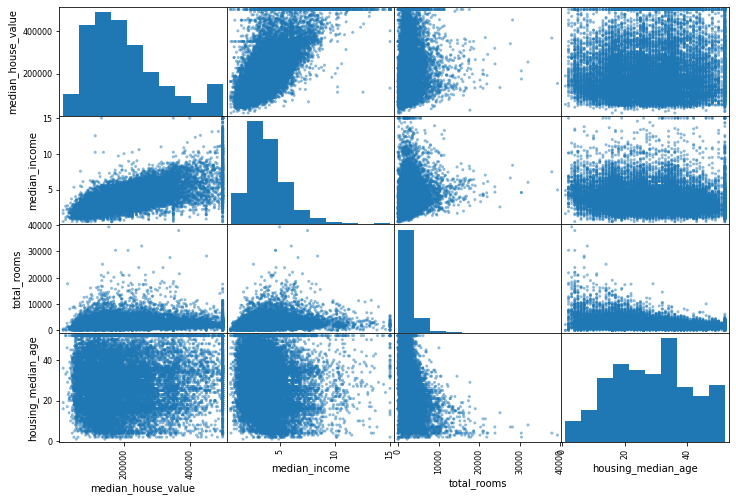

In [48]:
pd.plotting.scatter_matrix(
    housing[["median_house_value", "median_income", 
            "total_rooms", "housing_median_age"]], 
    figsize=(12, 8)
)
plt.show()

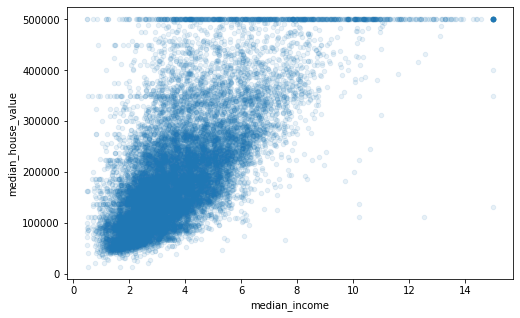

In [49]:
housing.plot(kind="scatter", 
             x="median_income", y="median_house_value", 
             alpha=0.1, figsize=(8, 5))
plt.show()

**New Features**

In [52]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
bedrooms_per_household     -0.043343
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms

In [54]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Missing Values

In [55]:
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop(["ocean_proximity"], axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [56]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [58]:
housing_num.median().to_numpy()

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [60]:
housing_tr = pd.DataFrame(imputer.transform(housing_num), 
                          columns=housing_num.columns, 
                          index=housing_num.index)

(16512, 8)

## Handling Text and Categorical Attributes

**Label Encoder**

In [63]:
ordinal_encoder = OrdinalEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [65]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**One Hot Encoder**

In [67]:
cat_encoder = OneHotEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [68]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [69]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]